## Importação das Bibliotecas

In [12]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from composicao_histograma_boxplot import composicao_histograma_boxplot
from composicao_histograma_boxplot import calcular_estatisticas

## Leitura e Análise da Base

In [2]:
# Leitura da planilha 
DADOS = r"C:\Users\rodri\OneDrive\Sincronização\Documentos\GitHub\hypothesis_test\teste_hipoteses.xlsx"
df = pd.read_excel(DADOS)  
df.head()

,Nº Amostra,pH Billings,pH Guarapiranga
0,1,4.59,7.88
1,2,5.64,5.43
2,3,3.28,6.52
3,4,4.63,6.75
4,5,6.93,7.11


In [3]:
df.tail()

,Nº Amostra,pH Billings,pH Guarapiranga
105,106,NaN,8.37
106,107,NaN,5.29
107,108,NaN,8.19
108,109,NaN,4.84
109,110,NaN,9.21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nº Amostra       110 non-null    int64  
 1   pH Billings      100 non-null    float64
 2   pH Guarapiranga  110 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.7 KB


## Identificação do Problema

Uma empresa responsável por realizar testes de qualidade nas águas das represas que abastecem a região
metropolitana da cidade de São Paulo **coletou 100 amostras de água da represa Billings e 110
amostras de água da represa Guarapiranga**.

O órgão de fiscalização suspeita que o **pH das águas da represa Guarapiranga seja superior ao pH das águas da represa Billings**, e solicitou a empresa um estudo para confirmação.

Por estarmos trabalhando com amostras e querermos fazer a comparação dos valores dessas populações, precisamos utilizar os Testes de Hipóteses para dar uma resposta confiável para a pergunta: 

- As águas da Guarapiranga possuem um pH superior as águas da Billings?

In [5]:
media = df[['pH Billings', 'pH Guarapiranga']].mean()
desvio_padrao = df[['pH Billings', 'pH Guarapiranga']].std().round(1)

print("Comparação das médias amostrais")
print(media)
print("------------")
print("Comparação dos desvios amostrais")
print(desvio_padrao)

Comparação das médias amostrais
pH Billings        5.801800
pH Guarapiranga    6.300818
dtype: float64
------------
Comparação dos desvios amostrais
pH Billings        1.4
pH Guarapiranga    1.5
dtype: float64


Como o histograma das amostras da represa Guarapiranga também se assemelha a uma **distribuição Normal**, vamos utilizar o Teste-t para duas populações.

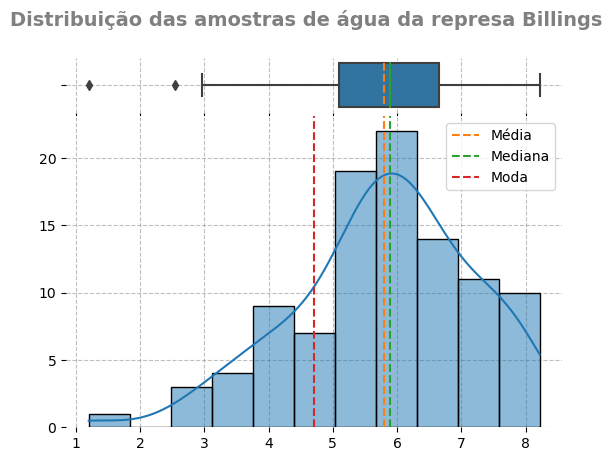

In [6]:
composicao_histograma_boxplot(df, 'pH Billings', titulo="Distribuição das amostras de água da represa Billings")

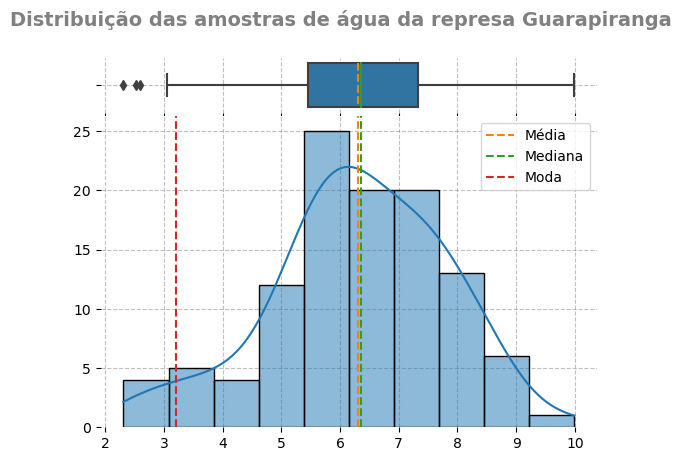

In [7]:
composicao_histograma_boxplot(df, 'pH Guarapiranga', titulo="Distribuição das amostras de água da represa Guarapiranga")

Para responder a pergunta precisamos saber se a média do pH da represa Guarapiranga é estatisticamente maior do que a média do pH da represa Billings.

Como já sabemos que a Hipótese Nula sempre apresentará uma igualdade e a Hipótese Alternativa uma desigualdade, definimos as seguintes hipóteses nula e
alternativa:
- H0: O pH da Guarapiranga é igual ao pH da Billings, ou: pHG = pHB
- H1: O pH da Guarapiranga é superior ao pH da Billings, ou: pHG > pHBm

Em caudas, quando H1 é "<" ou ">" escolhemos unicaudal, e quando H1 é "≠" escolhemos bicaudal. 

**Como o H1 definido é ">", utilizaremos a unicaudal.**

Também será necessário fazer um **Teste de Hipóteses** prelimninar para testar se as variâncias do pH das águas das duas represas **podem ser consideradas iguais**. 

Para isso, uma pausa no teste de média terá uma pausa e vamos aplicar o **Teste-F** que é utilizado para avaliar se as **duas variâncias** podem ser consideradas iguais quando as amostras possuem **distribuição** semelhante a **Normal**.

## Teste de Hipóteses das Variâncias

Como queremos saber exatamente se as variâncias do pH das águas das duas represas podem ser consideradas iguais, definimos as seguintes hipóteses nula e alternativa:

- H0: As variâncias do pH da Billings e Guarapiranga são iguais, ou: VarpHG = VarpHB
- H1: As variâncias do pH da Billings e Guarapiranga são diferentes, ou: VarpHG ≠ VarpHB

In [8]:
# Supondo que as duas colunas sejam 'amostra1' e 'amostra2'
amostra1 = df['pH Billings']
amostra2 = df['pH Guarapiranga']

In [15]:
# Teste-F para igualdade de variâncias
print("="*40)
print(" TESTE F PARA IGUALDADE DE VARIÂNCIAS ")
print("="*40)
print("""
Como queremos saber exatamente se as variâncias do pH das águas das duas represas
podem ser consideradas iguais, definimos as seguintes hipóteses nula e alternativa:

H0: As variâncias do pH da Billings e Guarapiranga são iguais, ou seja: VarpHG = VarpHB
H1: As variâncias do pH da Billings e Guarapiranga são diferentes, ou seja: VarpHG ≠ VarpHB
""")
print("="*40)

# Cálculo da variância amostral
var_amostra1 = np.var(amostra1, ddof=1)  # ddof=1 para variância amostral
var_amostra2 = np.var(amostra2, ddof=1)

# Definir F-Estatístico (maior variância sempre no numerador)
if var_amostra1 > var_amostra2:
    F = var_amostra1 / var_amostra2
    df1, df2 = len(amostra1) - 1, len(amostra2) - 1
else:
    F = var_amostra2 / var_amostra1
    df1, df2 = len(amostra2) - 1, len(amostra1) - 1

# Cálculo do p-valor bicaudal
p_value_one_tailed = 1 - stats.f.cdf(F, df1, df2)  # Probabilidade de ser maior
p_value_two_tailed = 2 * min(p_value_one_tailed, 1 - p_value_one_tailed)  # Bicaudal

# Exibir resultados formatados
print("="*40)
print(" RESULTADOS DO TESTE F ")
print("="*40)
print(f"Variância de pH Billings     : {var_amostra1:.5f}")
print(f"Variância de pH Guarapiranga : {var_amostra2:.5f}")
print(f"Estatística F                : {F:.5f}")
print(f"Graus de liberdade           : {df1}, {df2}")


print("-"*40)
print(f"p-valor (bicaudal)           : {p_value_two_tailed:.5f}")
print("-"*40)

# Interpretação do teste
alpha = 0.05
if p_value_two_tailed < alpha:
    print("Decisão: Rejeitamos H0 → As variâncias são significativamente diferentes.")
else:
    print("Decisão: Não rejeitamos H0 → As variâncias são estatisticamente iguais.")
print("="*40)

# Comentário final
print("""
O resultado da função TESTE.F foi 38,3%. Como o p-valor indica o quão plausível é H0, 
podemos antecipar que neste teste H0 se mostra bastante plausível.

As variências do pH da Billings e Guarapiranga podem ser consideradas iguais.
""")

 TESTE F PARA IGUALDADE DE VARIÂNCIAS 

Como queremos saber exatamente se as variâncias do pH das águas das duas represas
podem ser consideradas iguais, definimos as seguintes hipóteses nula e alternativa:

H0: As variâncias do pH da Billings e Guarapiranga são iguais, ou seja: VarpHG = VarpHB
H1: As variâncias do pH da Billings e Guarapiranga são diferentes, ou seja: VarpHG ≠ VarpHB

 RESULTADOS DO TESTE F 
Variância de pH Billings     : 1.92395
Variância de pH Guarapiranga : 2.28598
Estatística F                : 1.18817
Graus de liberdade           : 109, 99
----------------------------------------
p-valor (bicaudal)           : 0.38369
----------------------------------------
Decisão: Não rejeitamos H0 → As variâncias são estatisticamente iguais.

O resultado da função TESTE.F foi 38,3%. Como o p-valor indica o quão plausível é H0, 
podemos antecipar que neste teste H0 se mostra bastante plausível.

As variências do pH da Billings e Guarapiranga podem ser consideradas iguais.



Como o p-valor de 38,3% é maior que o nível de significância de 5%, podemos concluir que **não existem evidências estatísticas suficientes contra H0 , ou seja, não rejeitamos H0**.

Relembrando as hipóteses definidas:
- H0: As variâncias do pH da Billings e Guarapiranga são iguais, ou: VarpHG = VarpHB
- H1: As variâncias do pH da Billings e Guarapiranga são diferentes, ou: VarpHG ≠ VarpHB

E como não rejeitamos H0 , podemos dizer que **não existem evidências estatísticas de que a variância do pH das águas das duas represas não sejam iguais**.

Portanto, devemos escolher a opção "2: variâncias iguais".

In [10]:
# Teste de Hipóteses: média de duas populações
print("="*40)
print(" TESTE F PARA IGUALDADE DE VARIÂNCIAS ")
print("="*40)
print("""
Como o p-valor de 0,7% é menor que o nível de significância de 5%, podemos concluir
que existem evidências estatísticas suficientes contra H0 , ou seja, rejeitamos H0
.

Relembrando as hipóteses definidas:
H0: O pH da Guarapiranga é igual ao pH da Billings, ou: pHG = pHB
H1: O pH da Guarapiranga é superior ao pH da Billings, ou: pHG > pHB

E como rejeitamos H0 , podemos dizer que existem evidências estatísticas de que a
média do pH das águas da Guarapiranga é maior do que a média do pH das águas da
Billings.
""")
print("="*40)

# Suposição: As colunas são 'pH Billings' e 'pH Guarapiranga'
amostra1 = df['pH Billings'].dropna()
amostra2 = df['pH Guarapiranga'].dropna()

# Cálculo das variâncias amostrais
var_amostra1 = np.var(amostra1, ddof=1)
var_amostra2 = np.var(amostra2, ddof=1)

# Verificação das variâncias para definir o tipo de teste t
if var_amostra1 / var_amostra2 < 1.5 and var_amostra2 / var_amostra1 < 1.5:  # Critério empírico
    equal_var = True
else:
    equal_var = False

# Teste t de Student (para comparar médias)
t_stat, p_val = stats.ttest_ind(amostra1, amostra2, equal_var=equal_var)

# Exibição dos resultados
print("=" * 50)
print(" TESTE T PARA MÉDIAS (HIPÓTESE UNICAUDAL DIREITA) ")
print("=" * 50)
print(f"Estatística t               : {t_stat:.5f}")
print(f"p-valor (unicaudal, H1: amostra1 > amostra2) : {p_val / 2:.5f}")  # Divide por 2 para teste unicaudal
print(f"Variância de pH Billings    : {var_amostra1:.5f}")
print(f"Variância de pH Guarapiranga: {var_amostra2:.5f}")
print("-" * 50)

# Definição do nível de significância
alpha = 0.05

# Teste Unicaudal à Direita (H1: amostra1 > amostra2)
if t_stat > 0 and (p_val / 2) < alpha:
    print("Rejeitamos H0 → A média de pH Billings é significativamente maior que a de pH Guarapiranga.")
else:
    print("Não rejeitamos H0 → Não há evidência suficiente para afirmar que a média de pH Billings seja maior.")

print("=" * 50)

 TESTE F PARA IGUALDADE DE VARIÂNCIAS 

Como o p-valor de 0,7% é menor que o nível de significância de 5%, podemos concluir
que existem evidências estatísticas suficientes contra H0 , ou seja, rejeitamos H0
.

Relembrando as hipóteses definidas:
H0: O pH da Guarapiranga é igual ao pH da Billings, ou: pHG = pHB
H1: O pH da Guarapiranga é superior ao pH da Billings, ou: pHG > pHB

E como rejeitamos H0 , podemos dizer que existem evidências estatísticas de que a
média do pH das águas da Guarapiranga é maior do que a média do pH das águas da
Billings.

 TESTE T PARA MÉDIAS (HIPÓTESE UNICAUDAL DIREITA) 
Estatística t               : -2.48419
p-valor (unicaudal, H1: amostra1 > amostra2) : 0.00689
Variância de pH Billings    : 1.92395
Variância de pH Guarapiranga: 2.28598
--------------------------------------------------
Não rejeitamos H0 → Não há evidência suficiente para afirmar que a média de pH Billings seja maior.
